#Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

#Collecting data and data preprocessing

In [ ]:
mart_data = pd.read_csv('/content/big_mart_data.csv')

In [ ]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


FD,NC are given for differnet types of items and we can see there are string input features, categorical features, so we have encode them using label encoding.

In [ ]:
# no.of data points and features
mart_data.shape

(8523, 12)

In [ ]:
# getting some information about dataset and the type of data in the features
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

1. Item_Identifier

2. Item_Fat_Content

3. Item_Type

4. Outlet_Identifier

5. Outlet_Size

6. Outlet_Location_Type

7. Outlet_Type






In [ ]:
#checking for missing values
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Mean --> average value --> can be used for Item_weight

Mode --> most repeated value --> can be used for outlet size(categorical)

**Replacing the missing values in Item_weights with the mean:**

In [ ]:
sns.set()

In [ ]:
plt.figure(figsize = (6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<ipython-input-28-3c15a87aca1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_Weight'])


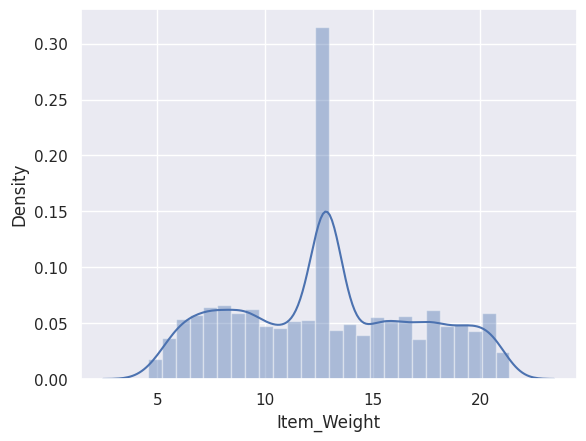

In [ ]:
sns.distplot(mart_data['Item_Weight'])
plt.show()

**As we can see the distribution curve of Item_Weight column, it is nearly a normal distribution , hence missing values can be replaced by the mean, if it were a skewed distribution, we would have replaced it by median or mode.**

In [ ]:
mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(), inplace = True)

In [ ]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Replacing the missing velues in Outlet_Size by it's mode:**

In [ ]:
# we use a pivot table
mode_of_outlet_size = mart_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x : x.mode()[0]))

In [ ]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values = mart_data['Outlet_Size'].isnull()

In [ ]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
mart_data.loc[missing_values, 'Outlet_Size'] = mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x : mode_of_outlet_size[x])

In [ ]:
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Data Analysis

**Numerical data columns (distribution and stats):**

In [ ]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<ipython-input-47-507aa146bd37>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_Weight'])


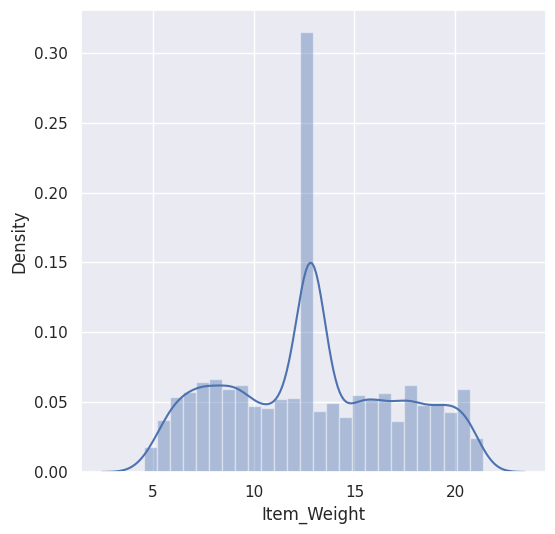

In [ ]:
# again see the distribution of item_weight column
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Weight'])
plt.show()

<ipython-input-48-115184722fca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_Visibility'])


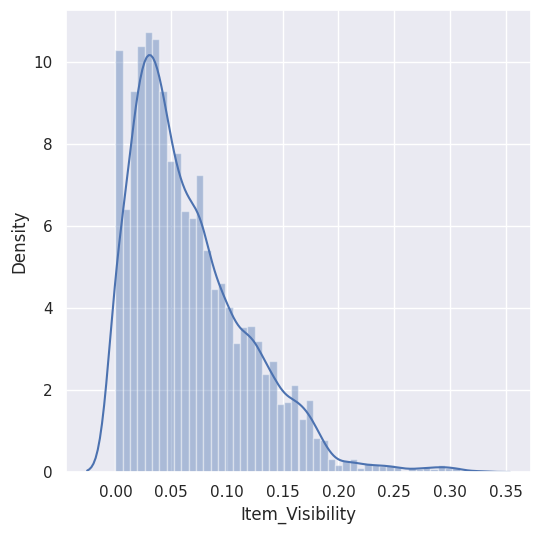

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Visibility'])
plt.show()

<ipython-input-49-eaf4121118f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_MRP'])


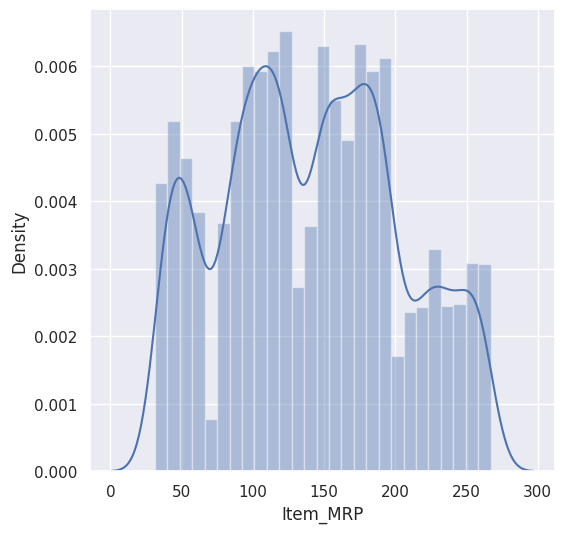

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_MRP'])
plt.show()

<ipython-input-50-b1186e669540>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_Outlet_Sales'])


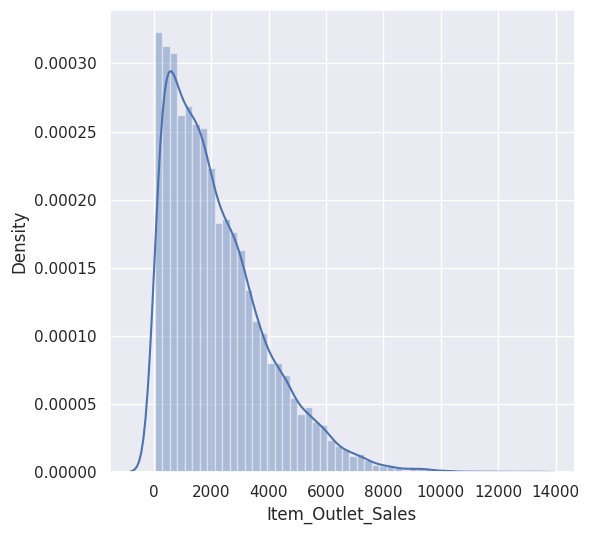

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Outlet_Sales'])
plt.show()

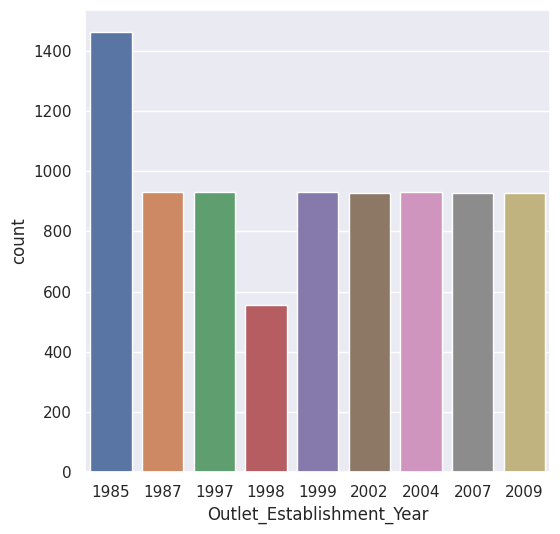

In [ ]:
# Outlet_Establishment_Year column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = mart_data)
plt.show()

**For Categorical features:**

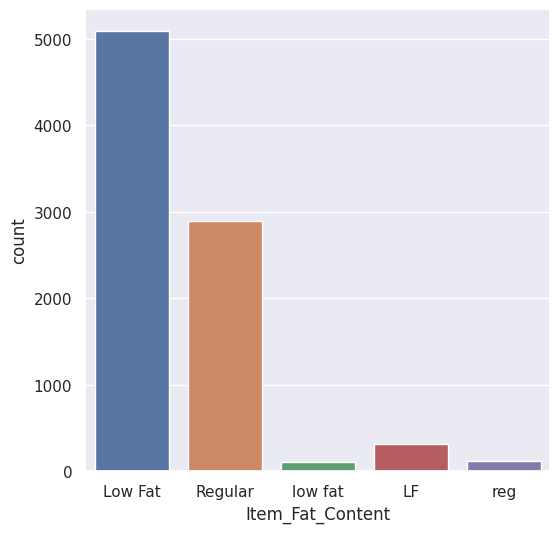

In [ ]:
# Item_Fat_Content column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = mart_data)
plt.show()

In [ ]:
# note in the above column we haave to add these low fat, LF and Low Fat as same type and Regular, reg as same type

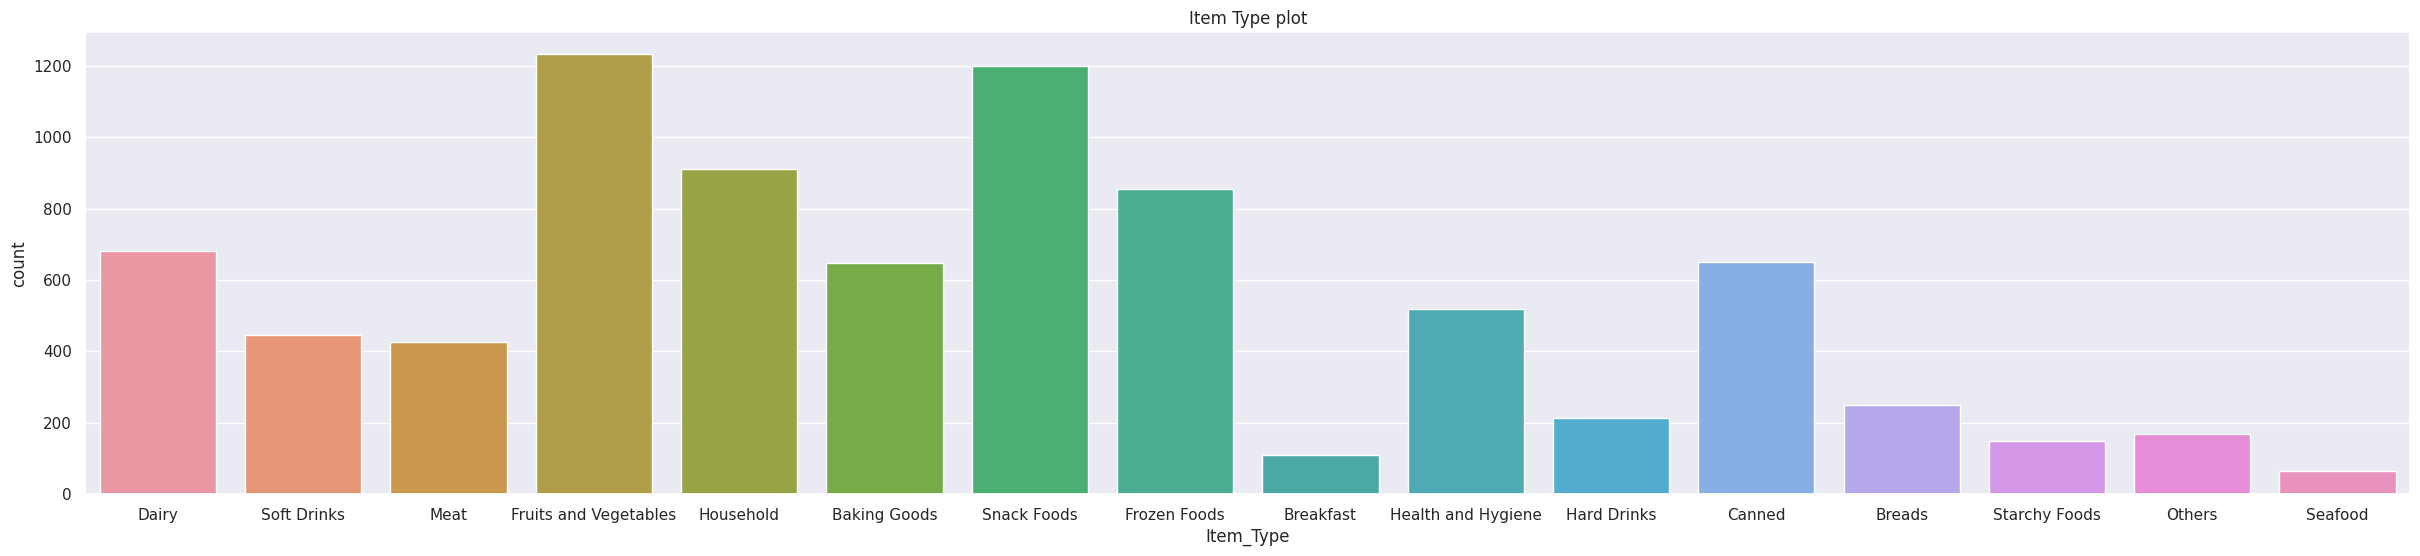

In [ ]:
#Item_Type column
plt.figure(figsize = (30,6))
sns.countplot(x = 'Item_Type', data = mart_data)
plt.title('Item Type plot')
plt.show()

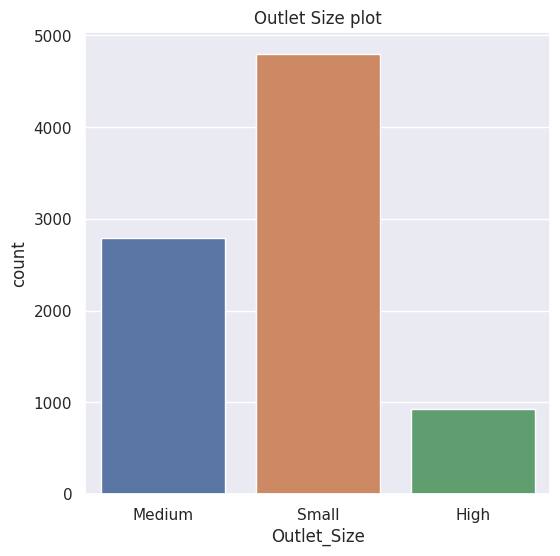

In [ ]:
#Outlet_Size column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Size', data = mart_data)
plt.title('Outlet Size plot')
plt.show()

# Data Pre-processing , Label Encoding

In [ ]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# cahnging low fat , Lf to Low Fat and reg to Regular
mart_data.replace({'Item_Fat_Content' : { 'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular' } }, inplace = True )

In [ ]:
mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label ENcoding of Categorical Features:

In [ ]:
encoder = LabelEncoder()

In [ ]:
mart_data['Item_Fat_Content'] = encoder.fit_transform(mart_data['Item_Fat_Content'])
mart_data['Item_Identifier'] = encoder.fit_transform(mart_data['Item_Identifier'])
mart_data['Item_Type'] = encoder.fit_transform(mart_data['Item_Type'])
mart_data['Outlet_Identifier'] = encoder.fit_transform(mart_data['Outlet_Identifier'])
mart_data['Outlet_Size'] = encoder.fit_transform(mart_data['Outlet_Size'])
mart_data['Outlet_Location_Type'] = encoder.fit_transform(mart_data['Outlet_Location_Type'])
mart_data['Outlet_Type'] = encoder.fit_transform(mart_data['Outlet_Type'])

In [ ]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#Seperation of features and target

In [ ]:
x = mart_data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = mart_data['Item_Outlet_Sales']

In [ ]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


#Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 3)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine learning model training

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Evaluation

In [ ]:
training_data_pred = regressor.predict(x_train)

In [ ]:
r2_train = metrics.r2_score(y_train, training_data_pred)

In [ ]:
print('R squared value for training data: ',r2_train)

R squared value for training data:  0.8496380666472023


In [ ]:
test_data_pred = regressor.predict(x_test)

In [ ]:
r2_test = metrics.r2_score(y_test,test_data_pred)

In [ ]:
print('R squared value for testing data: ',r2_test)

R squared value for testing data:  0.5609337806910826
